In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#read files
pr = pd.read_csv('./data/prc.csv')
br = pd.read_csv('./data/brc.csv')

In [3]:
# Displays Privacy Rights Dataset
pr[0:10]

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
0,"October 7, 2015",LoopPay,Woburn,Massachusetts,HACK,BSO,0,"""Months before its technology became the cente...",Media,https://www.nytimes.com/2015/10/08/technology/...,2017,42.479262,-71.152277
1,"September 1, 2016",New York State Psychiatric Institute,New York,New York,HACK,GOV,"21,880","""The New York State Office of Mental Health (O...",Media,https://healthitsecurity.com/news/ny-psychiatr...,2017,40.712784,-74.005941
2,"January 8, 2017",E-Sports Entertainment Association (ESEA),Cologne,Berlin,HACK,BSO,"1,503,710","""E-Sports Entertainment Association (ESEA), on...",Media,http://www.csoonline.com/article/3155397/secur...,2017,50.937531,6.960279
3,"January 10, 2017",Legal Aid Society of Orange County (LASOC),Santa Ana,California,DISC,NGO,0,"""LASOC developed the I-CAN! web application, w...",California Attorney General,NaN,2017,33.765160,-117.835264
4,"January 3, 2017",MetroPlus Health Plan,New York,New York,DISC,MED,808,As reported by Health and Human Services unaut...,Government Agency,NaN,2017,40.706783,-74.005889
5,"January 9, 2017","Kevin Harrington, CPA",Rancho Cordova,California,HACK,BSF,0,"""On November 11, 2016, I detected that someone...",California Attorney General,NaN,2017,38.596462,-121.268255
6,"January 12, 2017",SwimOutlet.com,Campbell,California,HACK,BSO,0,"""On October 31, 2016, we began investigating s...",California Attorney General,NaN,2017,37.288231,-121.935698
7,"January 13, 2017",Children's Hospital of Los Angeles,Los Angeles,California,PORT,MED,"3,600","""On December 21, 2016, we learned that a lapto...",California Attorney General,NaN,2017,34.052234,-118.243685
8,"January 19, 2017",CoPilot Provider Services Inc.,New Hyde Park,New York,HACK,BSO,"220,000","""CoPilot maintains a particular website, www.m...",California Attorney General,NaN,2017,40.735102,-73.687908
9,"January 20, 2017",Wonderful Center for Health Innovation,Lost Hills,California,PORT,MED,0,""" On December 12, 2016, it was discovered that...",California Attorney General,NaN,2017,35.616349,-119.694294


In [4]:
#Displays Balloon Race Dataset
br[0:10]

,Entity,alternative name,records lost,YEAR,story,SECTOR,METHOD,interesting story,DATA SENSITIVITY,DISPLAYED RECORDS,Unnamed: 10,source name,1st source link,2nd source link
0,AOL,American Online,"92,000,000",2004,Jun 2004. A former America Online software eng...,web,inside job,NaN,1,"92,000,000",NaN,CNN,http://money.cnn.com/2004/06/23/technology/aol...,NaN
1,Ameritrade Inc.,online broker,"200,000",2005,Apr 2005. Computer backup tape containing pers...,financial,lost device,NaN,2,NaN,NaN,NBC,http://www.nbcnews.com/id/7561268/,NaN
2,Citigroup,NaN,"3,900,000",2005,Jun 2005. Blame the messenger! A box of comput...,financial,lost device,y,3,NaN,NaN,NY Times,http://www.nytimes.com/2005/06/07/business/07d...,NaN
3,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...","40,000,000",2005,Jun 2005. CardSystems was fingered by MasterCa...,financial,hacked,y,3,NaN,NaN,Wired,https://www.wired.com/2005/06/cardsystems-data...,NaN
4,AOL,American Online,"20,000,000",2006,Aug 2006. Derp. AOL voluntarily released searc...,web,oops!,y,1,NaN,NaN,Tech Crunch,http://techcrunch.com/2006/08/06/aol-proudly-r...,NaN
5,US Dept of Vet Affairs,NaN,"26,500,000",2006,Jul 2006. The Veterans Affairs Department agre...,"government, military",lost device,NaN,2,NaN,NaN,"GCN, US Gov",http://gcn.com/Articles/2009/02/02/VA-data-bre...,https://www.va.gov/oig/pubs/VAOIG-06-02238-163...
6,Automatic Data Processing,"Business outsourcing, payrolls, benefits","125,000",2006,"Jul 2006. Automatic Data Processing, one of th...",financial,poor security,NaN,2,NaN,NaN,ABC News,http://abcnews.go.com/Technology/story?id=2160...,NaN
7,KDDI,Japanese telecommunications operator,"4,000,000",2006,"Jun 2006. Press report: ""Tokyo police have arr...",telecoms,hacked,y,1,NaN,NaN,Computer World,http://www.computerworld.com/s/article/9001150...,NaN
8,Hewlett Packard,NaN,"200,000",2006,Mar 2006. Laptop lost/stolen containing employ...,"tech, retail",lost device,y,2,NaN,NaN,Computer Weekly,https://www.computerweekly.com/news/2240076956...,NaN
9,Monster.com,Jobs website,"1,600,000",2007,Aug 2007. A trojan virus stole log-ins that we...,web,hacked,y,2,NaN,NaN,BBC News,http://news.bbc.co.uk/1/hi/6956349.stm,NaN


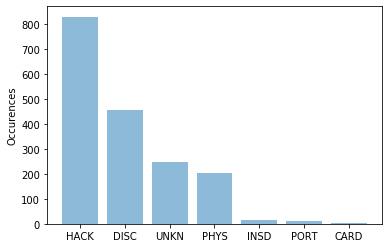

In [5]:
#Shows graph comparing all types of data breach (Privacy Rights)
pr_breach = pr.loc[:, 'Type of breach']
pr_breach_count = pr_breach.value_counts()
pr_breach_index = pr_breach_count.index
plt.bar(pr_breach_index, pr_breach_count, align='center', alpha=0.5)
plt.ylabel('Occurences')
plt.show()

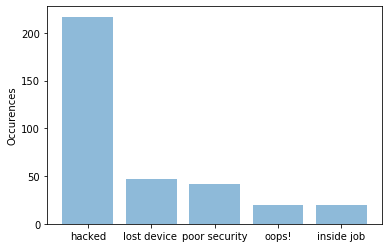

In [6]:
#Shows graph comparing all types of data breach (Balloon Race)
br_breach = br.loc[:, 'METHOD']
br_breach_count = br_breach.value_counts()
br_breach_index = br_breach_count.index
plt.bar(br_breach_index, br_breach_count, align='center', alpha=0.5)
plt.ylabel('Occurences')
plt.show()

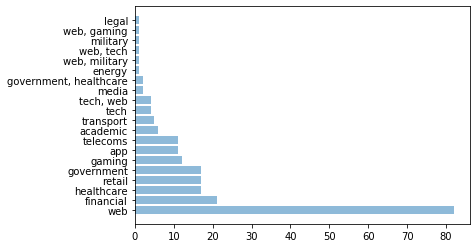

In [7]:
#Shows graph of organization types for each hacked data breach (Balloon Race)
br_hacked = br.loc[br['METHOD'] == 'hacked']
br_type_count = br_hacked.loc[:, 'SECTOR'].value_counts()
br_type_index = br_type_count.index.tolist()
br_pos = [i for i, _ in enumerate(br_type_index)]
plt.barh(br_pos, br_type_count, align='center', alpha=0.5)
plt.yticks(br_pos, br_type_index)
plt.show()

In [8]:
pr_story = pr.loc[:, 'Description of incident'].astype(str)
br_story = br.loc[:, 'story'].astype(str)
br_interesting = br.loc[br['interesting story'] == 'y'].loc[:,'story'] #Only those marked with interesting story

story_total = pd.concat([pr_story, br_story],ignore_index=True)
print(story_total[0])
for story in story_total:
    if(story[0] == '"'):
        story[1:len(story)-1]

"Months before its technology became the centerpiece of Samsung’s new mobile payment system, LoopPay, a small Massachusetts subsidiary of the South Korean electronics giant, was the target of a sophisticated attack by a group of government-affiliated Chinese hackers.As early as March, the hackers — alternatively known as the Codoso Group or Sunshock Group by those who track them — had breached the computer network of LoopPay, a start-up in Burlington, Mass., that was acquired by Samsung in February for more than $250 million, according to several people briefed on the still-unfolding investigation, as well as Samsung and LoopPay executives."


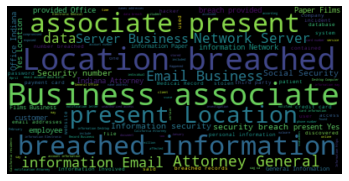

In [9]:
all_text = " ".join(story for story in story_total)
wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()